Comparing the algorithms

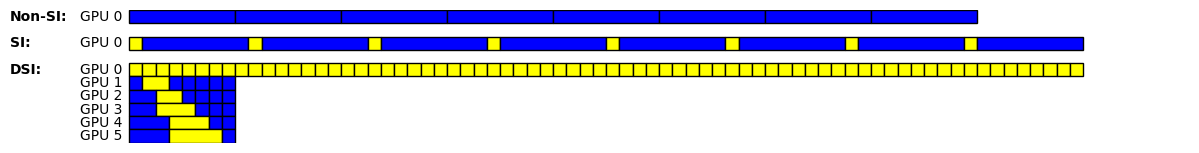

In [1]:
from dataclasses import dataclass
from typing import List

import matplotlib.pyplot as plt


@dataclass
class TimeUnit:
    width: int
    color: str


@dataclass
class GPU:
    time_units: List[TimeUnit]


@dataclass
class Algorithm:
    name: str
    gpus: List[GPU]


def draw_time_unit(ax, time_unit: TimeUnit, x, y):
    """Draw a rectangle at position (x, y) based on the TimeUnit dataclass."""
    ax.add_patch(
        plt.Rectangle(
            (x, y), time_unit.width, 1, edgecolor="black", facecolor=time_unit.color
        )
    )


def draw_gpu(ax, gpu: GPU, y_offset, algorithm_name=None, gpu_label=None):
    """Draw a row of rectangles based on the GPU dataclass."""
    x_start = 0
    for time_unit in gpu.time_units:
        draw_time_unit(ax, time_unit, x_start, y_offset)
        x_start += time_unit.width
    if algorithm_name:
        ax.text(
            -9,
            y_offset + 0.5,
            algorithm_name,
            ha="left",
            va="center",
            fontsize=10,
            fontweight="bold",
        )
    if gpu_label:
        ax.text(-0.5, y_offset + 0.5, gpu_label, ha="right", va="center", fontsize=10)


def draw_algorithm(ax, algorithm: Algorithm, start_y):
    """Draw all GPUs of an algorithm with consistent spacing."""
    for i, gpu in enumerate(algorithm.gpus):
        algorithm_name = f"{algorithm.name}:" if i == 0 else ""
        gpu_label = f"GPU {i}"
        draw_gpu(ax, gpu, start_y - i, algorithm_name, gpu_label)
    return start_y - len(algorithm.gpus)


def setup_axes(ax):
    """Configure the plot axes for better visualization."""
    ax.set_xlim(-5, 80)  # Increase as needed to fit your labels and graphics
    ax.set_ylim(-9, 1)  # Adjust based on the number of rows and spacing required
    ax.set_aspect("equal")
    ax.axis("off")


# Define the Alternatives and Rows (unchanged)
alg_a = Algorithm(
    name="Non-SI", gpus=[GPU(time_units=[TimeUnit(width=8, color="blue")] * 8)]
)

alg_b = Algorithm(
    name="SI",
    gpus=[
        GPU(
            time_units=[
                *(
                    [TimeUnit(width=1, color="yellow")]
                    + [TimeUnit(width=8, color="blue")]
                )
            ]
            * 8
        )
    ],
)

alg_c = Algorithm(
    name="DSI",
    gpus=[
        GPU(time_units=[TimeUnit(width=1, color="yellow")] * 72),
        GPU(
            time_units=[
                TimeUnit(width=1, color="blue"),
                TimeUnit(width=2, color="yellow"),
            ]
            + [TimeUnit(width=1, color="blue") for _ in range(5)]
        ),
        GPU(
            time_units=[
                TimeUnit(width=2, color="blue"),
                TimeUnit(width=2, color="yellow"),
            ]
            + [TimeUnit(width=1, color="blue") for _ in range(4)]
        ),
        GPU(
            time_units=[
                TimeUnit(width=2, color="blue"),
                TimeUnit(width=3, color="yellow"),
            ]
            + [TimeUnit(width=1, color="blue") for _ in range(3)]
        ),
        GPU(
            time_units=[
                TimeUnit(width=3, color="blue"),
                TimeUnit(width=3, color="yellow"),
            ]
            + [TimeUnit(width=1, color="blue") for _ in range(2)]
        ),
        GPU(
            time_units=[
                TimeUnit(width=3, color="blue"),
                TimeUnit(width=4, color="yellow"),
            ]
            + [TimeUnit(width=1, color="blue")]
        ),
    ],
)

# Create figure and plot
fig, ax = plt.subplots(figsize=(12, 10))
setup_axes(ax)

# Plotting each alternative using draw_algorithm
start_y = 0
start_y = draw_algorithm(ax, alg_a, start_y)
start_y = draw_algorithm(ax, alg_b, start_y - 1)
draw_algorithm(ax, alg_c, start_y - 1)

plt.tight_layout()
plt.show()